<a href="https://colab.research.google.com/github/arshika21cs007/Mental-Health-Analysis/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Libraries**

In [4]:
# Import libraries for numerical computations
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for data preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Import libraries for model evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    RocCurveDisplay,
)

# Import libraries for machine learning
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Suppress warnings (use with caution)
import warnings
warnings.filterwarnings("ignore")

**Read Data**


In [5]:
df = pd.read_csv("Mental Health Dataset.csv")
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


**EDA - Cleaning**
1.Understand variables
2.Clean dataset (missing data, redundant data, outliers)

1. **Gather Information About the Data**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196361 entries, 0 to 196360
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                196361 non-null  object
 1   Gender                   196361 non-null  object
 2   Country                  196361 non-null  object
 3   Occupation               196361 non-null  object
 4   self_employed            192718 non-null  object
 5   family_history           196360 non-null  object
 6   treatment                196360 non-null  object
 7   Days_Indoors             196360 non-null  object
 8   Growing_Stress           196360 non-null  object
 9   Changes_Habits           196360 non-null  object
 10  Mental_Health_History    196360 non-null  object
 11  Mood_Swings              196360 non-null  object
 12  Coping_Struggles         196360 non-null  object
 13  Work_Interest            196360 non-null  object
 14  Social_Weakness     

In [7]:
df.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,196361,196361,196361,196361,192718,196360,196360,196360,196360,196360,196360,196360,196360,196360,196360,196360,196360
unique,580,2,35,6,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,31-60 days,Yes,Yes,Maybe,Low,No,Maybe,Maybe,No,No
freq,1604,143847,116996,43596,174008,114394,103108,41025,70133,76249,69548,69084,102604,70435,71413,158170,77208


**2a) Check Missing Variables**

In [8]:
print('Percentage of Missing Values')
(df.isna().mean() * 100).round(1)

Percentage of Missing Values


Timestamp                  0.0
Gender                     0.0
Country                    0.0
Occupation                 0.0
self_employed              1.9
family_history             0.0
treatment                  0.0
Days_Indoors               0.0
Growing_Stress             0.0
Changes_Habits             0.0
Mental_Health_History      0.0
Mood_Swings                0.0
Coping_Struggles           0.0
Work_Interest              0.0
Social_Weakness            0.0
mental_health_interview    0.0
care_options               0.0
dtype: float64

In [9]:

df.dropna(inplace = True)

In [10]:
df.isna().sum()


Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64

**2b) Check for Duplicate Entries, Unnecessary Columns, and Data Formatting**

In [11]:
# Print amount of duplicates
print('Amount of duplicates: {:,}'.format(df.duplicated().sum()))

# Print percentage of duplicates
print('Percentage of duplicates: {:.1%}'.format(df.duplicated().mean()))

Amount of duplicates: 1,524
Percentage of duplicates: 0.8%


In [12]:
df.drop_duplicates(inplace = True)

print('Amount of duplicates: {:,}'.format(df.duplicated().sum()))

Amount of duplicates: 0


In [13]:
# We are not going to use the Timestamp column in our analysis
df.drop(columns = "Timestamp", inplace = True)

**2c) Check Outliers**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191194 entries, 3 to 196359
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Gender                   191194 non-null  object
 1   Country                  191194 non-null  object
 2   Occupation               191194 non-null  object
 3   self_employed            191194 non-null  object
 4   family_history           191194 non-null  object
 5   treatment                191194 non-null  object
 6   Days_Indoors             191194 non-null  object
 7   Growing_Stress           191194 non-null  object
 8   Changes_Habits           191194 non-null  object
 9   Mental_Health_History    191194 non-null  object
 10  Mood_Swings              191194 non-null  object
 11  Coping_Struggles         191194 non-null  object
 12  Work_Interest            191194 non-null  object
 13  Social_Weakness          191194 non-null  object
 14  mental_health_interview  

**EDA - Visualizations**

In [15]:
df.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


In [16]:
def countsplot(category):
  """
  Creates a count plot and returns a DataFrame with counts and percentages.

  Args:
      category (str): The column name for the categorical variable to plot.

  Returns:
      pandas.DataFrame: A DataFrame containing counts and percentages for each category.
  """

  # Create count plot with dynamic title
  sns.countplot(data = df, x = category)
  plt.ylabel("Count")
  plt.title(f"{category} Distribution")
  plt.show()

  # Calculate counts and percentages
  category_counts = df[category].value_counts()
  category_percentages = df[category].value_counts(normalize = True)

  # Combine counts and percentages into a DataFrame
  stats_df = pd.DataFrame({"Count": category_counts, "Proportion": category_percentages})
  stats_df["Count"] = stats_df["Count"].apply("{:,}".format)
  stats_df["Proportion"] = stats_df["Proportion"].apply("{:.1%}".format)

  return stats_df


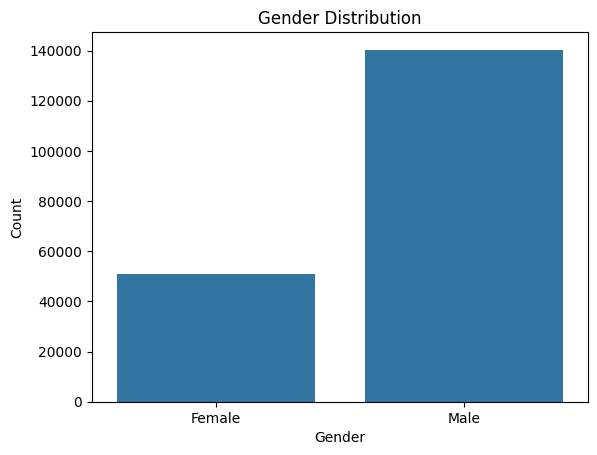

,Count,Proportion
Gender,,
Male,"140,336",73.4%
Female,"50,858",26.6%


In [17]:
countsplot("Gender")

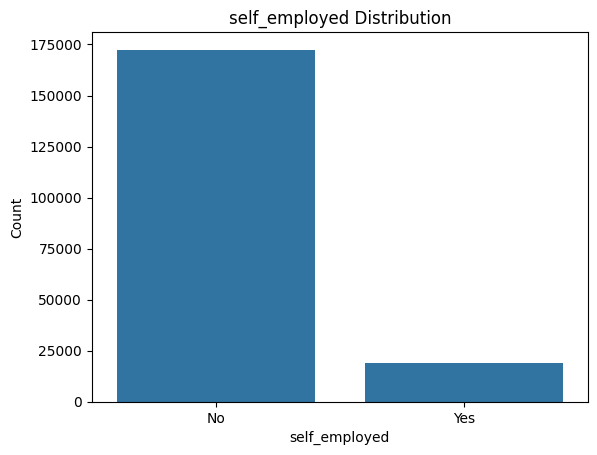

,Count,Proportion
self_employed,,
No,"172,505",90.2%
Yes,"18,689",9.8%


In [18]:
countsplot("self_employed")

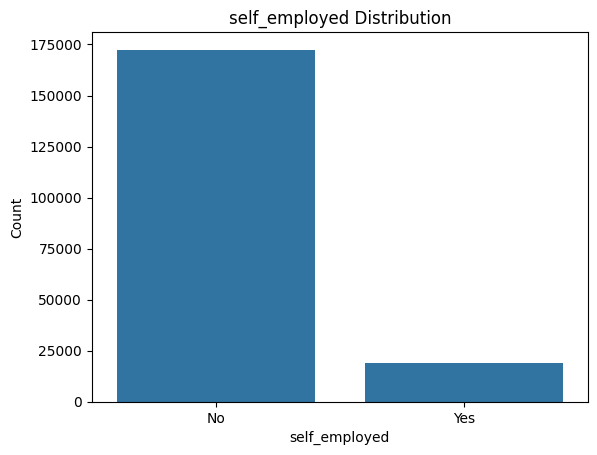

,Count,Proportion
self_employed,,
No,"172,505",90.2%
Yes,"18,689",9.8%


In [19]:
countsplot("self_employed")

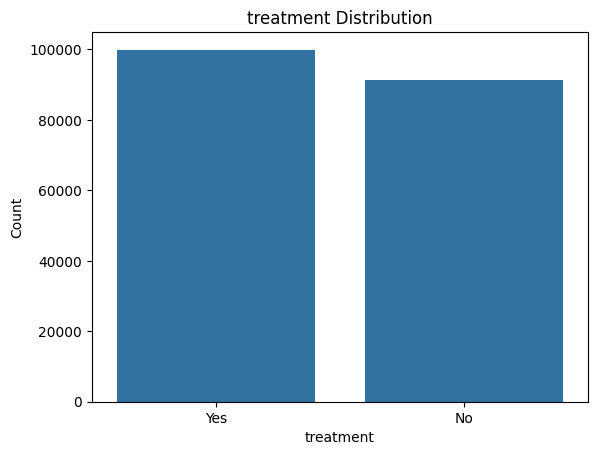

,Count,Proportion
treatment,,
Yes,"99,925",52.3%
No,"91,269",47.7%


In [20]:
countsplot("treatment")

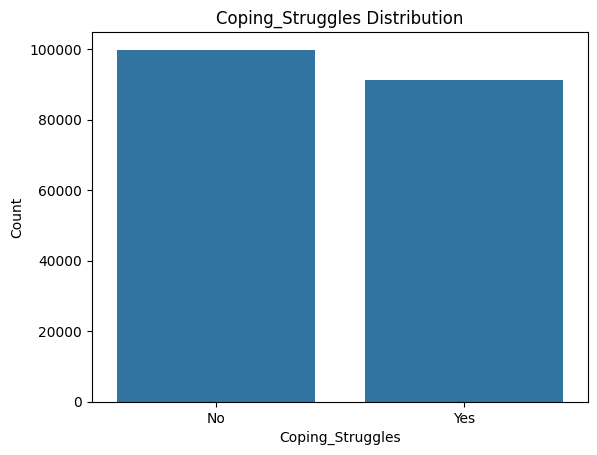

,Count,Proportion
Coping_Struggles,,
No,"99,854",52.2%
Yes,"91,340",47.8%


In [21]:
countsplot("Coping_Struggles")

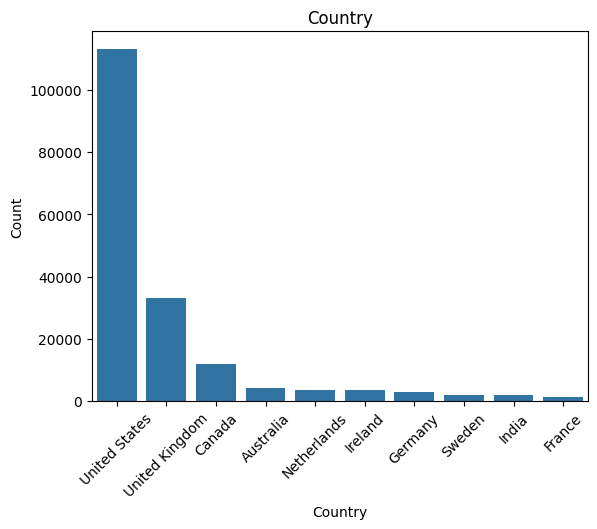

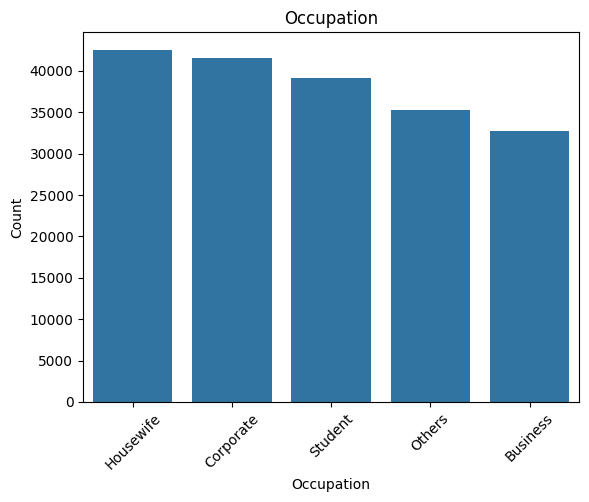

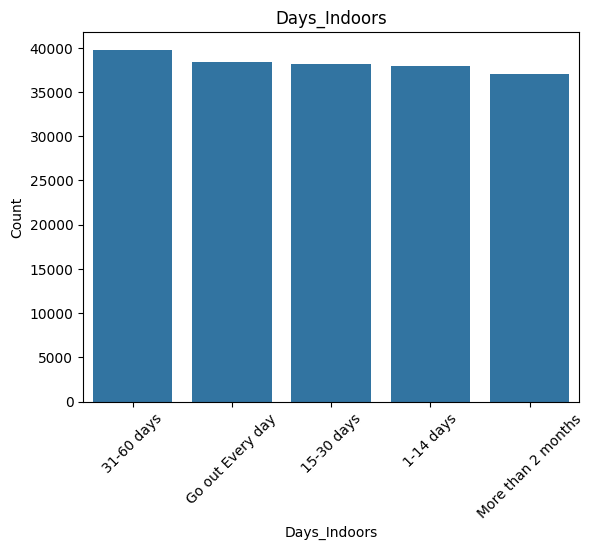

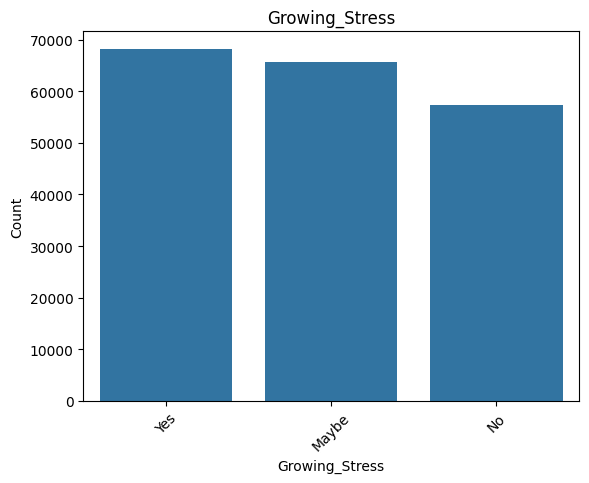

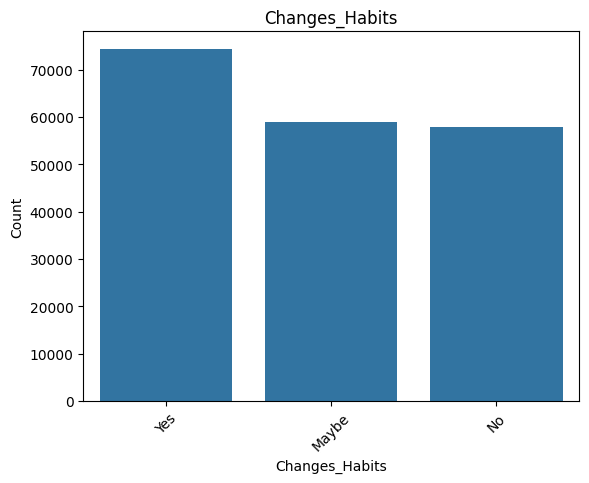

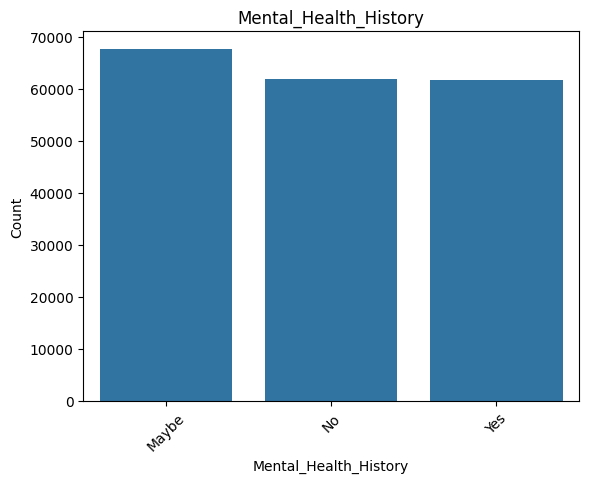

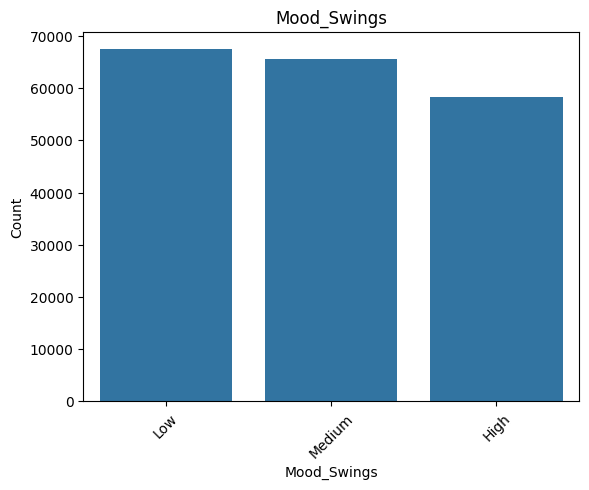

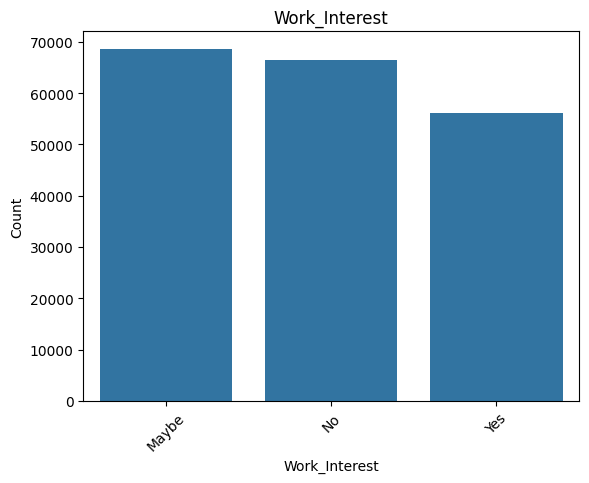

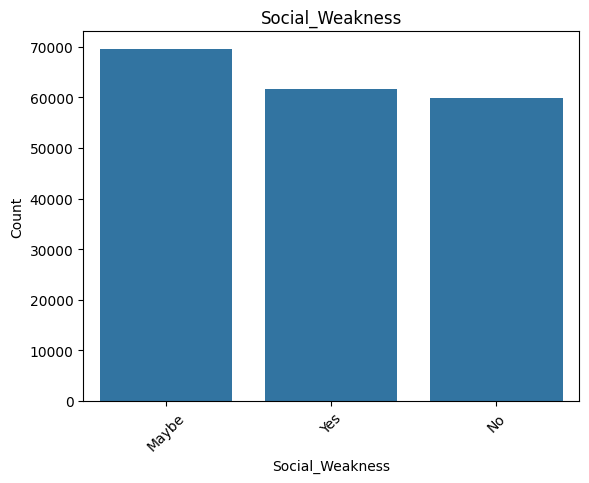

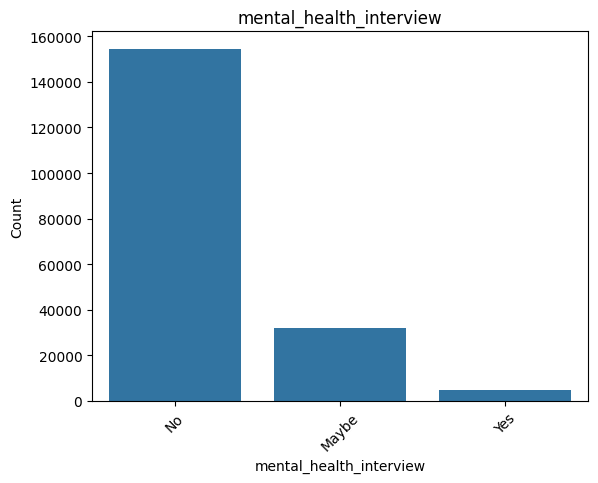

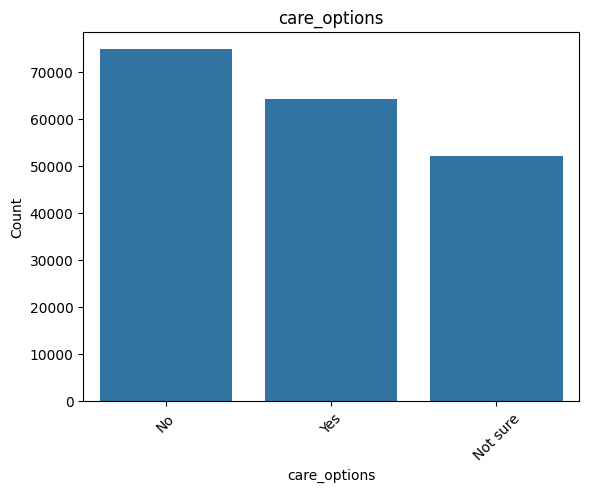

In [23]:
def top_10_bar(category, x_rotation = 45):
    """
    Plots a bar plot showing the distribution of a categorical variable for the top 10 categories.

    Args:
        category (str): The column name for the categorical variable to plot.
        x_rotation (int, optional): The number of degrees to rotate the x-axis labels. Defaults to 45.
    """
    # Get the top 10 categories and their counts in a DataFrame
    top_10_df = df[category].value_counts().head(10).reset_index()

    # Plotting
    sns.barplot(data = top_10_df, x = category, y = "count")
    plt.title(category)
    plt.xticks(rotation = x_rotation)
    plt.xlabel(category)
    plt.ylabel("Count")
    plt.show()
for column in df.columns:
    if df[column].nunique() > 2:
        top_10_bar(column)

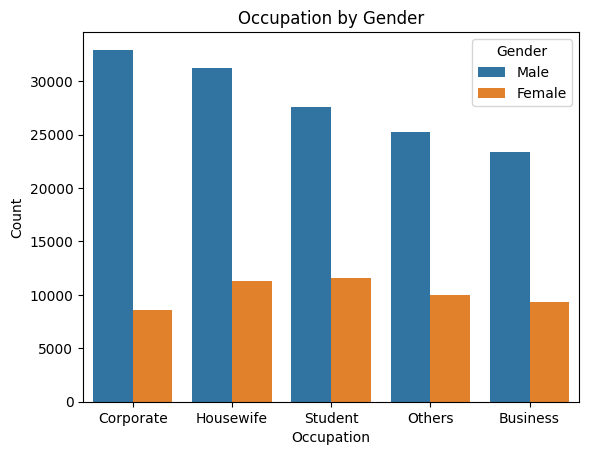

,Gender,Occupation,Count
5,Male,Corporate,32936
6,Male,Housewife,31200
7,Male,Student,27600
8,Male,Others,25200
9,Male,Business,23400
0,Female,Student,11564
1,Female,Housewife,11328
2,Female,Others,10030
3,Female,Business,9322
4,Female,Corporate,8614


In [24]:
# Group data by Gender then filter by Occupation and count occurrences
gender_data = (
    df
    .groupby("Gender")["Occupation"]
    .value_counts()
    .reset_index(name = "Count")
    .sort_values(by = "Count", ascending = False)
)

sns.barplot(data = gender_data, x = "Occupation", y = "Count", hue = "Gender")
plt.title("Occupation by Gender")
plt.show()

gender_data


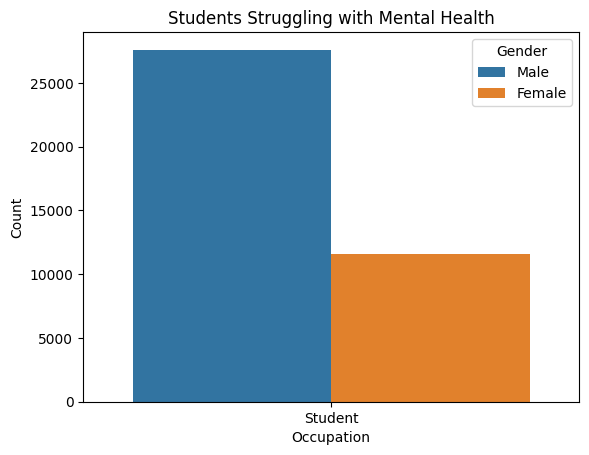

,Gender,Occupation,Count,Percentage
7,Male,Student,27600,70.5
0,Female,Student,11564,29.5


In [25]:
# Filter the gender data to include only entries where the occupation is "Student"
student_data = gender_data[gender_data["Occupation"] == "Student"]

sns.barplot(data = student_data, x = "Occupation", y = "Count", hue = "Gender")
plt.title("Students Struggling with Mental Health")
plt.show()

# Get the total count
total_student_count = student_data["Count"].sum()

# Calculate percentages based on gender counts
student_data["Percentage"] = (
    student_data["Gender"]
    .apply(
        lambda gender: round((student_data.loc[student_data["Gender"] == gender, "Count"].iloc[0] / total_student_count) * 100, 1)
    )
)

student_data

In [26]:
# Filter the DataFrame to include only United States students and count occurrences by gender
us_student_data = (
    df
    .loc[(df["Country"] == "United States") & (df["Occupation"] == "Student")]
    .groupby("Gender")["Occupation"]
    .value_counts()
    .reset_index(name = "Count")
)

# Get the total count
total_us_student_count = us_student_data["Count"].sum()

# Calculate percentages based on gender counts
us_student_data["Percentage"] = (
    us_student_data["Gender"]
    .apply(
        lambda gender: round((us_student_data.loc[us_student_data["Gender"] == gender, "Count"].iloc[0] / total_us_student_count) * 100, 1)
    )
)

us_student_data


,Gender,Occupation,Count,Percentage
0,Female,Student,7742,33.2
1,Male,Student,15548,66.8


In [27]:
print(f"Out of {total_student_count:,} students around the world struggling with mental health, {total_us_student_count:,} are US students.")

Out of 39,164 students around the world struggling with mental health, 23,290 are US students.


**Data Preprocessing**

In [28]:
# Create a LabelEncoder object
le = LabelEncoder()

# Apply LabelEncoder to each column
encoded_df = df.apply(le.fit_transform)

encoded_df.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,0,34,1,0,1,1,0,2,1,2,2,0,1,2,0,2
4,0,34,1,0,1,1,0,2,1,2,2,0,1,2,1,2
5,0,25,1,0,0,1,0,2,1,2,2,0,1,2,0,1
6,0,0,1,0,1,1,0,2,1,2,2,0,1,2,1,1
7,0,34,1,0,0,0,0,2,1,2,2,0,1,2,1,0


In [29]:
X = encoded_df.drop("Mood_Swings", axis = 1)

y = encoded_df["Mood_Swings"]
y

3         2
4         2
5         2
6         2
7         2
         ..
196355    0
196356    0
196357    0
196358    0
196359    0
Name: Mood_Swings, Length: 191194, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(152955, 15) (38239, 15)
(152955,) (38239,)


**Model Building & Comparisons**


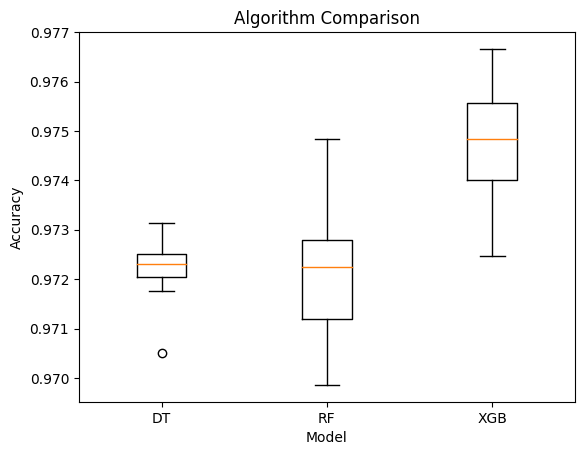

,Model,Mean Accuracy,Standard Deviation
0,DT,0.972181,0.000659
1,RF,0.971992,0.001415
2,XGB,0.974744,0.001188


In [31]:
def pipeline_classification(pipelines):
  """
  Performs classification using cross-validation, evaluates different models,
  and makes predictions for each model on the test set.

  Args:
      pipelines (list): List of tuples containing model names and pipeline objects.

  Returns:
      pandas.DataFrame: A DataFrame containing model names, mean accuracy, standard deviation,
                        and a dictionary with test set predictions for each model.
  """

  # Initialize lists to store results
  cv_results = []
  model_names = []
  model_predictions = {}
  model_probabilities = {}

  # Perform cross-validation and store results
  for name, pipe in pipelines:
      # Fit the pipeline to the training data
      pipe.fit(X_train, y_train)

      kfold = KFold(n_splits = 10, shuffle = True)
      cv_results.append(cross_val_score(pipe, X_train, y_train, cv = kfold, scoring = 'accuracy', n_jobs = -1))
      model_names.append(name)

      # Make predictions on the test set and store them
      model_predictions[name] = pipe.predict(X_test)

      # Calculate probabilities on the test set and store them
      model_probabilities[name] = pipe.predict_proba(X_test)

  # Plot the results
  plt.boxplot(cv_results)
  plt.xticks(range(1, len(model_names) + 1), model_names)
  plt.title('Algorithm Comparison')
  plt.xlabel('Model')
  plt.ylabel('Accuracy')
  plt.show()

  # Convert results to a DataFrame
  results_df = pd.DataFrame({
      'Model': model_names,
      'Mean Accuracy': [scores.mean() for scores in cv_results],
      'Standard Deviation': [scores.std() for scores in cv_results]
  })

  return results_df, model_predictions, model_probabilities
# Define the list of pipelines
pipelines = [
    ('DT', Pipeline([('scaler', MinMaxScaler()), ('DT', DecisionTreeClassifier())])),
    ('RF', Pipeline([('scaler', MinMaxScaler()), ('RF', RandomForestClassifier())])),
    ('XGB', Pipeline([('XGB', XGBClassifier())])),
  ]

results_df, model_predictions, model_probabilities = pipeline_classification(pipelines)
results_df

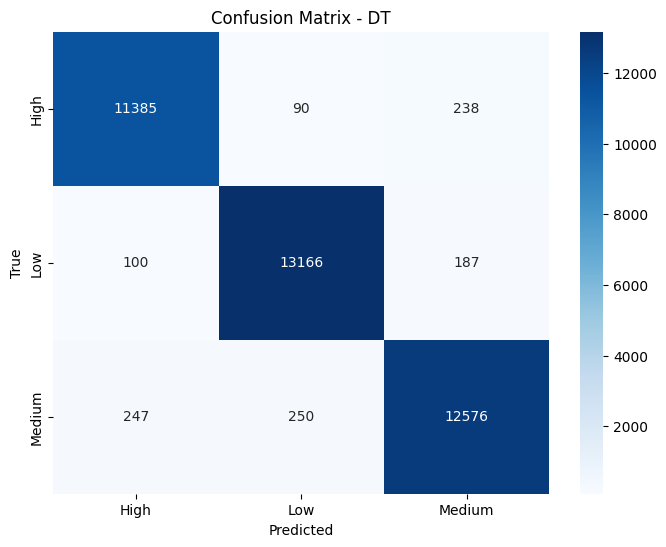

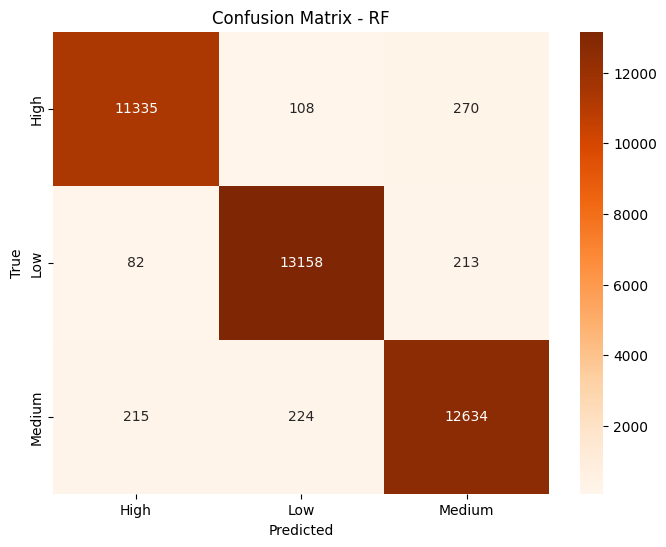

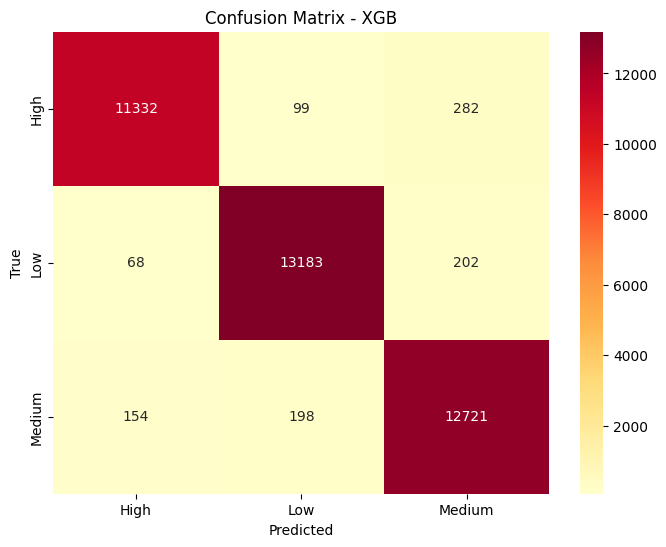

In [32]:
def plot_confusion_matrix(y_true, y_pred, class_names = None, cmap = "Blues", title = ""):
  """
  Plots a confusion matrix for classification tasks.

  Args:
      y_true (array-like): True labels for the data.
      y_pred (array-like): Predicted labels for the data.
      class_names (list, optional): List of class names for the labels.
      cmap (str, optional): Colormap to use for the heatmap. Defaults to 'Blues'.
      title (str, optional): Title for the confusion matrix plot. Defaults to an empty string.

  Returns:
      None
  """

  cm = confusion_matrix(y_true, y_pred)

  if class_names is None:
      class_names = np.unique(y_true)

  plt.figure(figsize = (8, 6))
  sns.heatmap(
      cm,
      annot = True,
      fmt = 'd',
      cmap = cmap,
      xticklabels = class_names,
      yticklabels = class_names
  )

  plt.title(f"Confusion Matrix - {model_name}")
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()
# Extract model names
models = results_df.loc[:, "Model"]

# Extract model predictions
predictions = list(model_predictions.values())

# Define labels for the class outputs
labels = df["Mood_Swings"].unique()[::-1]

# Define a dictionary mapping model names to colormaps
cmap_dict = {'DT': 'Blues', 'RF': 'Oranges', 'XGB': 'YlOrRd'}

for model_name, y_pred in zip(models, predictions):
  plot_confusion_matrix(
      y_test,
      y_pred,
      class_names = labels,
      cmap = cmap_dict.get(model_name),
      title = model_name
  )

In [33]:
def get_model_scores(models, predictions, y_test, average = "None"):
  """
  Calculates and returns precision, recall, and F1 scores for each model.

  Args:
      models: A list of trained machine learning models.
      predictions: A list of predictions for each model, corresponding to the models list.
      y_test: True labels for the test set.
      average (str, optional): Averaging type for metrics.

  Returns:
      A Pandas DataFrame containing the model scores.
  """

  scores = [{
      'Model': model_name,
      'Accuracy': round(accuracy_score(y_test, y_pred), 3),
      'Precision': round(precision_score(y_test, y_pred, average = average), 3),
      'Recall': round(recall_score(y_test, y_pred, average = average), 3),
      'F1 Score': round(f1_score(y_test, y_pred, average = average), 3)
  } for model_name, y_pred in zip(models, predictions)]

  scores_df = pd.DataFrame(scores)

  return scores_df
scores = get_model_scores(models, predictions, y_test, average = "macro")

scores


,Model,Accuracy,Precision,Recall,F1 Score
0,DT,0.971,0.971,0.971,0.971
1,RF,0.971,0.971,0.971,0.971
2,XGB,0.974,0.974,0.973,0.974
